#### `Recap` linear model

We know how to describe a `linear model` to explain the data we observe

$$y=ax+b$$

where $a$ and $b$ are model `parameters` that we want to find

We also show that by plugging $y$ into

$$h(y)=\frac{1}{1+e^{-y}}$$

We can use the linear model to do `classification` problems

While we have not touched this point specifically, the fact that $h(y)$ (recall that its `shape` is a not a straight line but a $s$-shaped curve) allows us to predict class of a point in classification problem is demonstrating a way to enhancing the linear model to handle `nonlinearity`

In this case, we pass the output of $y=ax+b$ through a `nonlinear function` that is $h(y)$

#### Handle `nonlinearity` by projection into `feature space`

There are also other ways we can handle nonlinearity

One idea is to `project` input $x$ into some `feature space` $\phi(x)$, for example

$$\mathbf{\phi}(x)=\begin{bmatrix} x^2 \\ x \\ 1 \end{bmatrix}$$

This translates the linear model $y=ax+b$ to

$$y=\mathbf{\phi}(x)^T\mathbf{\theta}$$

where $\mathbf{\theta}$ is a vector containing all parameters

#### What is a `feature`?

The term `feature` generally describes all candidate characteristics of the input that `we believe` is associated to the output we observe

For example, by setting $\phi(x)$ as above, what we are saying is that `we believe the output we observe in data is associated to the input in three potential ways`

* constant (that is, regardless of input, the output is the same)
* linear (indicated by $x$)
* quadratic (indicated by $x^2$)

Therefore, what $y=\phi(x)^T\theta$ does is to find a `linear combination` of three functions that results in $y$

$$\begin{align*}
y&=x^2\\
y&=x\\
y&=1
\end{align*}$$

#### `Local` vs `global` behavior

However, the problem with such setup is that each of the three functions $x^2, x, 1$ are `global` in nature, regardless of the value of input $x$

So, our assumption here is that the behavior of the nonlinear function we want to model, no matter what $x$ is, is `always the same` in terms of combination of $x^2, x, 1$

This global nature can cause problems when handling with nonlinear functions that have `local patterns`, for example, a function's behavior around $x=-5$ may not be the same as around $x=5$......

So what do we do?

#### An `infeasible` way to model local behavior

Consider a function $f(x)$ of any `arbitrary form` running from $-\infty$ to $+\infty$.

`Ideally`, the model that can `perfectly fit` the local behavior of the function should look something like this

$$f(x)=...+f(-2)\cdot\phi(x, -2)+...+f(-1)\cdot\phi(x, -1)+...+f(0)\cdot\phi(x, 0)+...+f(1)\cdot\phi(x, 1)+...+f(2)\cdot\phi(x, 2)+...$$

This function containing an `infinite` number of terms, each corresponding to a real number (only some integer terms are shown here)

Each `term` consists of two parts

* a function $\phi(x, x')$ to determine the `exact matching` between the input $x$ and the point $x'$ corresponding to the term (we call $x'$ the `anchor point` of this term for clarity). What we want this function to do is to output `1` if $x=x'$, and `0` otherwise. As an example

$$\begin{align*}
\phi(x, -2) = \left\{
\begin{array}{cl}
0 & x\neq-2 \\
1 & x=-2
\end{array}
\right.
\end{align*}
$$

* and a `coefficient` corresponding to `function value` at this anchor point $f(-2)$

This way, no matter what $x$ is used as input to $f(x)$ (assume $x=x'$ is the input), only the term corresponding to $x'$ will be activated, and the rest will be zero

$$f(x')=f(x)\cdot \phi(x, x')|_{x=x'}$$

This is exactly the `local` behavior that we want to model, as terms corresponding to locations that are not $x'$ are all gone

#### From `exact matching` to `correlation`

So, how is this useful for `our purpose`?

In our case, we will `not` have infinite number of anchor points to work with, we will only have a few data points from which we try to build the function

Assume we only know $f(x)$ at $x=-2,-1,-0,1,2$

Then, the model becomes

$$f(x)= f(-2)\cdot\phi(x, -2)+f(-1)\cdot\phi(x, -1)+f(0)\cdot\phi(x, 0)+f(1)\cdot\phi(x, 1)+f(2)\cdot\phi(x, 2)$$

Now, the problem becomes tricky: if the input $x$ is not precisely $-2, -1, 0, 1$, or $2$, then, $f(x)$ becomes zero, as no term is remaining...

So, how to solve the issue?

We solve the issue by `relaxing` the criteria for $\phi(x, x')$

Instead of making $\phi(x, x')$ `go to zero` as soon as $x\neq x'$
* we want the behavior of the function at $x$ to be `similar` to its behavior at $x'$, if $x$ is `not too far away` from $x'$
* we want the behavior of the function at $x$ to be `less and less similar` to its behavior at $x'$, if $x$ is `moving away from` $x'$

This way, we don't need to worry about $x\neq x'$ as we are no longer looking for `exact matching`, but rather `correlation` between $x$ and $x'$

#### Kernel and `radial basis function` (RBF)

So, how to formulate $\phi(x, x')$ to achieve the correlation behavior we want for $f(x)$ when $x\neq x'$?

One common formulation is through `radial basis function`

(as it measures `correlation or similarity` between two points, it is commonly refered to as a `kernel` function)

$$\phi(x, x')=e^{-\frac{|x-x'|^2}{2\sigma^2}}$$

This is a `bell curve` centered around $x'$, and `decays` as $x$ pulls away from $x'$, with a decay rate controled by parameter $\sigma$.

It is easy to see that the behavior of RBF kernel satisfies the 2 requirements we want for $\phi(x, x')$

#### One more change

Due the usage of kernel function that measures similarity rather than finds exact matching, we can no longer use function value $f(x')$ as the coefficient for the term $\phi(x', x')$, as the terms from $x\neq x'$ will start to `influence` $f(x')$, no matter how small the influence is

As a result, we will treat coefficents as `unknown parameters` to quantify such influence, which will be determined during optimization

#### Putting everything together

Now, we can have the formulation of $f(x)$ with five known data points at $-2, -1, 0, 1, 2$

$$\boxed{f(x)= \theta_1\cdot\phi(x, -2)+\theta_2\cdot\phi(x, -1)+\theta_3\cdot\phi(x, 0)+\theta_4\cdot\phi(x, 1)+\theta_5\cdot\phi(x, 2)}$$

This is still in `linear form`, and can be solved using the gradient descent approach we learned before

#### Visualization

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

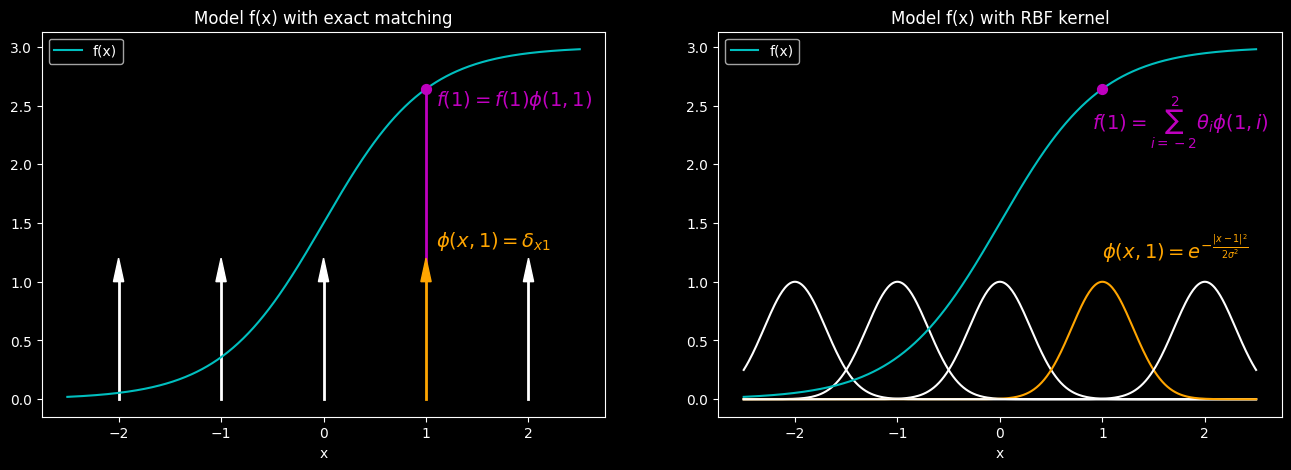

In [11]:
x_values = np.linspace(-2.5, 2.5, 400)

def sigmoid_fn(x):
    return (1 / (1 + np.exp(-2 * x)))*3

def rbf(x, x_prime, sigma):
    return np.exp(-(x - x_prime)**2 / (2 * sigma**2))

fig_1, ax_1 = plt.subplots(1, 2, figsize=(16, 5))

ax_1[0].plot(x_values, sigmoid_fn(x_values), color='c', label='f(x)')

for i in [-2, -1, 0, 1, 2]:
    if i==1:
        ax_1[0].plot([i,i], [0,1], 'orange', linewidth=2, zorder=0)
        ax_1[0].arrow(i, 1, 0.000, 0.001, head_width=0.1, head_length=0.2, color='orange')
    else:
        ax_1[0].plot([i,i], [0,1], 'w', linewidth=2, zorder=0)
        ax_1[0].arrow(i, 1, 0.000, 0.001, head_width=0.1, head_length=0.2, color='w')

ax_1[0].text(1.1, 1.3, r"$\phi(x, 1)=\delta_{x1}$", fontsize=14, c='orange')
ax_1[0].plot([1,1], [1.1,sigmoid_fn(1)], 'm', linewidth=2, zorder=0)
ax_1[0].scatter(1, sigmoid_fn(1), color='m', s=50, zorder=5)
ax_1[0].text(1.1, 2.5, r"$f(1)=f(1)\phi(1,1)$", fontsize=14, c='m')
ax_1[0].set_xlabel('x')
ax_1[0].legend()
ax_1[0].set_title('Model f(x) with exact matching')

for i in [-2, -1, 0, 1, 2]:
    if i==1:
        ax_1[1].plot(x_values, rbf(x_values, i, 0.3), color='orange')
    else:
        ax_1[1].plot(x_values, rbf(x_values, i, 0.3), color='w')

ax_1[1].text(1, 1.2, r"$\phi(x, 1)=e^{-\frac{|x-1|^2}{2\sigma^2}}$", fontsize=14, c='orange')
ax_1[1].scatter(1, sigmoid_fn(1), color='m', s=50, zorder=5)
ax_1[1].text(0.9, 2.3, r"$f(1)=\sum_{i=-2}^2 \theta_i \phi(1, i)$", fontsize=14, c='m')

ax_1[1].plot(x_values, sigmoid_fn(x_values), color='c', label='f(x)')
ax_1[1].set_xlabel('x')
ax_1[1].legend()
ax_1[1].set_title('Model f(x) with RBF kernel')

plt.show()

#### Implemenetation for `nonlinear classification` for 1D data points

We now implement the RBF kernel in Python to help us classify 1D data points that are `not` linearly separable

x shape: (97,)
y shape: (97,)


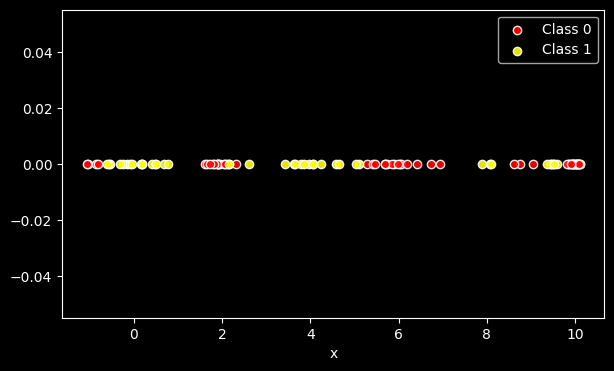

In [12]:
np.random.seed(42)

def generate_class_data(centers, stds, num_points_list):

    data = []
    for center, std, num_points in zip(centers, stds, num_points_list):
        cluster_data = np.random.normal(center, std, num_points)
        data.append(cluster_data)

    return np.concatenate(data)

# Class 0
centers_class0 = [-1, 2, 6, 9, 10]
stds_class0 = [0.3, 0.2, 0.5, 0.2, 0.1]
num_points_class0_list = [5, 15, 15, 3, 19]
class0_data = generate_class_data(centers_class0, stds_class0, num_points_class0_list)

# Class 1
centers_class1 = [0, 4, 8, 9.5]
stds_class1 = [0.5, 0.7, 0.2, 0.1]
num_points_class1_list = [15, 15, 3, 7]
class1_data = generate_class_data(centers_class1, stds_class1, num_points_class1_list)

# Combine data
x = np.concatenate([class0_data, class1_data])
print(f'x shape: {x.shape}')
y = np.array([0] * sum(num_points_class0_list) + [1] * sum(num_points_class1_list))
print(f'y shape: {y.shape}')

plt.figure(figsize=(7, 4))
plt.scatter(class0_data, np.zeros(sum(num_points_class0_list)), color='red', label='Class 0', alpha=0.9, edgecolors='w')
plt.scatter(class1_data, np.zeros(sum(num_points_class1_list)), color='yellow', label='Class 1', alpha=0.9, edgecolors='w')

plt.xlabel('x')
plt.legend()
plt.show()

We can see that the two classes are `not` separable by a straight line

In [13]:
kernel = 'rbf'

def square_kernel(x):
    return np.vstack([x**2, x, np.ones(len(x))]).T

def rbf_kernel(x, sigma):
    num_points = x.shape[0]
    k = np.zeros((num_points, num_points)) # this matrix is symmetric
    for i in range(num_points):
        for j in range(num_points):
            sq_dist = np.sum((x[i] - x[j])**2)
            k[i, j] = np.exp(-sq_dist / (2 * sigma**2))
    return k

if kernel == 'rbf':
    sigma = 0.5
    x_k = rbf_kernel(x, sigma)
    print(f'x_rbf shape: {x_k.shape}')

    # Initial guess
    theta = 0.5*np.ones(x_k.shape[1])
    print(f'theta shape: {theta.shape}')

elif kernel == 'square':
    x_k = square_kernel(x)
    print(f'x_sq shape: {x_k.shape}')

    # Initial guess
    theta = 0.5*np.ones(x_k.shape[1])
    print(f'theta shape: {theta.shape}')

x_rbf shape: (97, 97)
theta shape: (97,)


Iteration 0: Loss = 4.544723673325525
Iteration 500: Loss = 0.09721915849456433
Iteration 1000: Loss = 0.08048690318577655
x_test shape: (400,)
x_test_rbf shape: (400, 97)
y_test shape: (400,)


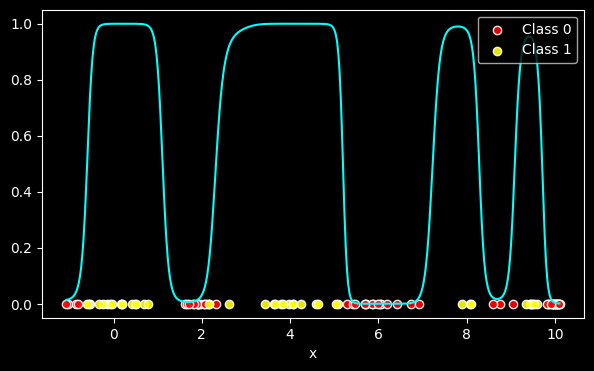

In [14]:
learning_rate = 0.01
num_iterations = 1500

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss
loss_values = []

for i in range(num_iterations):
    y_pred = x_k @ theta # same shape as y
    h_pred = sigmoid(y_pred)  # same shape as y

    # Compute loss
    loss = -y*np.log(h_pred) - (1 - y)*np.log(1 - h_pred) # same shape as y
    loss = np.mean(loss) # take average, a scalar

    loss_values.append(loss)

    # Compute gradients
    d_theta = x_k.T @ (h_pred - y) # same shape as theta, each row is gradient for each parameter

    # Update parameters
    theta -= learning_rate * d_theta # same shape as theta

    if i % 500 == 0:
        print(f'Iteration {i}: Loss = {loss}')

def rbf_kernel_test(x_test, x, sigma):
    num_test_points = x_test.shape[0]
    num_train_points = x.shape[0]
    k_test = np.zeros((num_test_points, num_train_points))
    for i in range(num_test_points):
        for j in range(num_train_points):
            sq_dist = np.sum((x_test[i] - x[j])**2)
            k_test[i, j] = np.exp(-sq_dist / (2 * sigma**2))
    return k_test

x_test = np.linspace(x.min(), x.max(), 400)
print(f'x_test shape: {x_test.shape}')
if kernel == 'rbf':
    x_test_kernel = rbf_kernel_test(x_test, x, sigma)
    print(f'x_test_rbf shape: {x_test_kernel.shape}')
elif kernel == 'square':
    x_test_kernel = square_kernel(x_test)
    print(f'x_test_sq shape: {x_test_kernel.shape}')

y_test = sigmoid(x_test_kernel @ theta)  # same shape as x_test
print(f'y_test shape: {y_test.shape}')

plt.figure(figsize=(7, 4))
plt.scatter(class0_data, np.zeros(sum(num_points_class0_list)), color='red', label='Class 0', alpha=0.9, edgecolors='w')
plt.scatter(class1_data, np.zeros(sum(num_points_class1_list)), color='yellow', label='Class 1', alpha=0.9, edgecolors='w')

plt.plot(x_test, y_test, color='cyan')

plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()